In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [430]:
df = pd.read_csv(r"C:\Rig\Pandora's BOX\ML ig\Datasets\Sleep_health_and_lifestyle_dataset.csv")

## Data Preprocessing

In [432]:
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
90,91,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,NaN
273,274,Female,49,Nurse,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
61,62,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
361,362,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
279,280,Female,50,Engineer,8.3,9,30,3,Normal,125/80,65,5000,NaN


In [433]:
df.shape

(374, 13)

In [434]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [435]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

The NaN values in Sleep Disorder refer to 'No disorder'. Let's fill 'em up.

In [437]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [438]:
df.select_dtypes(include='object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64

In [439]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [440]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [441]:
split_bp = df['Blood Pressure'].str.split('/',expand=True).astype(int)
df['Upper BP'] = split_bp[0]
df['Lower BP'] = split_bp[1]

In [442]:
df = df.drop(columns=['Person ID','Blood Pressure', 'Occupation'])

In [443]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper BP,Lower BP
0,Male,27,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [444]:
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

We have very less sample of 'Obese' category

In [446]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

<Axes: xlabel='Sleep Disorder', ylabel='count'>

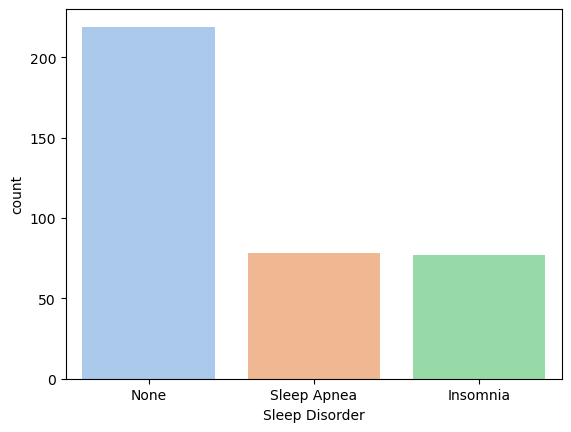

In [447]:
sns.countplot(df,x = 'Sleep Disorder',hue='Sleep Disorder', palette='pastel' )

<Axes: >

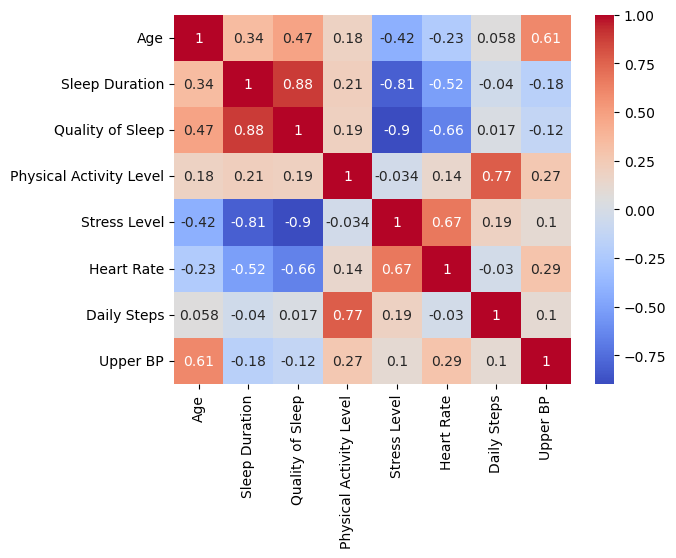

In [448]:
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'Heart Rate', 'Daily Steps','Upper BP']

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='BMI Category', ylabel='Sleep Duration'>

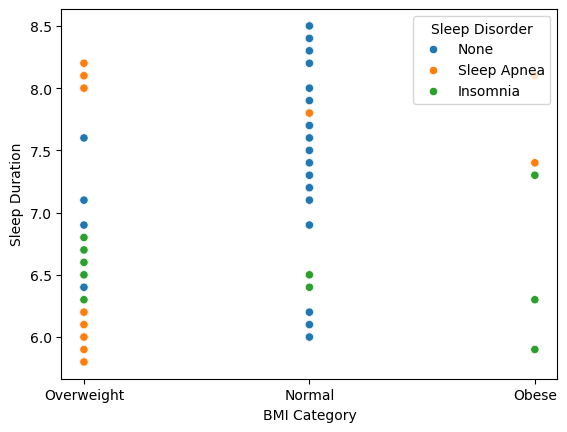

In [449]:
sns.scatterplot(df, x='BMI Category',y='Sleep Duration',hue='Sleep Disorder')

Transforming Categorical columns to numeric

In [452]:
oe = OrdinalEncoder()
df[['Gender', 'BMI Category', 'Sleep Disorder']] = oe.fit_transform(df[['Gender', 'BMI Category', 'Sleep Disorder']])

In [453]:
X = df.drop(columns='Sleep Disorder')
y = df['Sleep Disorder']

In [454]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [455]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [456]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),  
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVC': SVC(probability=True, random_state=42), # probability=True is needed for ROC curve
    'XGBoost': XGBClassifier(random_state=42)
}

In [457]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8800
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80        16
         1.0       0.93      0.93      0.93        43
         2.0       0.92      0.75      0.83        16

    accuracy                           0.88        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.88      0.88        75

Random Forest Accuracy: 0.8800
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76        16
         1.0       0.95      0.98      0.97        43
         2.0       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

K-Nearest Neighbors Accuracy: 0.8667
              precision    recall  f1-score   support

         0.0       0.67      0.88      0.76        16
         1.0       0.95 

In [458]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 4, 10]
    },
    'Random Forest': {
        'n_estimators': [10,20, 50, 100, 200],
        'max_depth': [None,3, 5, 10, 15]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [2,4,6,10,15,25]
    },
    'SVC': {
        'C' : [1,2,5,7],
    'kernel' : ['rbf', 'linear', 'poly','sigmoid'] 
    },
    'XGBoost': {
        'n_estimators': [5,10,15,50,100,200],
        'max_depth': [2,4,10,15,20],
     }  
}

best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    pred = grid.predict(X_test)
    best_models[name] = grid.best_estimator_
    print(f"{name} best params: {grid.best_params_}")
    print("Accuracy : ", round(accuracy_score(y_test, pred),4))
    print("F1-score : ", round(f1_score(y_test, pred, average='weighted'),4))

Logistic Regression best params: {'C': 10}
Accuracy :  0.9067
F1-score :  0.9048
Random Forest best params: {'max_depth': 5, 'n_estimators': 100}
Accuracy :  0.88
F1-score :  0.8785
K-Nearest Neighbors best params: {'n_neighbors': 4}
Accuracy :  0.8667
F1-score :  0.8661
SVC best params: {'C': 1, 'kernel': 'linear'}
Accuracy :  0.9067
F1-score :  0.9058
XGBoost best params: {'max_depth': 2, 'n_estimators': 50}
Accuracy :  0.9067
F1-score :  0.9058


##### We'll be choosing XGBoost classifier model 

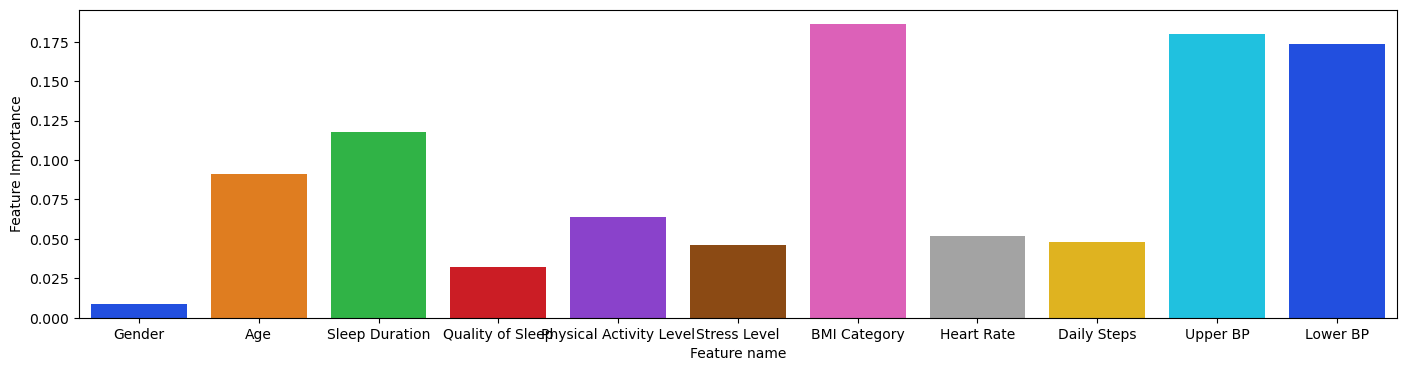

In [474]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feat_importance = pd.DataFrame({
    'Feature name': X.columns,
    'Feature Importance': rf.feature_importances_
    })
plt.figure(figsize=(17,4))
sns.barplot(data=feat_importance, x='Feature name', y='Feature Importance',hue='Feature name',palette='bright')
plt.show()

In [475]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy : ", round(accuracy_score(y_test, y_pred),4))

Accuracy :  0.9067


In [476]:
import pickle

pickle_out = open('sleep.pkl','wb')
pickle.dump(xgb, pickle_out)
pickle_out.close()

*__Fin__*